<a href="https://colab.research.google.com/github/JakeOh/202105_itw_bd26/blob/main/lab_ml/ml03_train_test_set_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 훈련 셋과 테스트 셋을 나누는 방법
    * 순차적 추출(sequential sampling)
    * 임의 추출(random sampling)
    * 층화 추출(stratified sampling)
* 분류 모델 평가 지표
    * 정확도(accuracy)
    * 정밀도(precision)
    * 재현율(recall)
    * F1-score
* 특성 스케일링(feature scaling)
    * 표준화(standardization)
    * 정규화(normalization)

# 필요한 모듈 import

In [62]:
import numpy as np  # ndarray 함수, 메서드
import pandas as pd  # Series, DataFrame 함수, 메서드
import matplotlib.pyplot as plt  # 시각화
import seaborn as sns  # 시각화

# Machine Learning
from sklearn.neighbors import KNeighborsClassifier  # KNN 분류기(모델, 알고리즘)
from sklearn.model_selection import train_test_split  # 훈련/테스트 셋 분리 함수
from sklearn.metrics import confusion_matrix, classification_report  # 모델 평가 지표
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler  # 특성 스케일링

# 데이터 준비

* fish.csv 파일: 어종, 생선 특성(무게, 길이, ...)
    * 문제를 간단히 하기 위해서, 어종 2개(Bream, Smelt)와 특성 2개(Weight, Length) 사용

In [2]:
fish_csv = 'https://github.com/rickiepark/hg-mldl/raw/master/fish.csv'

In [3]:
fish = pd.read_csv(fish_csv)  # CSV 파일 ---> DataFrame 생성

In [4]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [5]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [7]:
# 타겟 벡터(1차원 배열)
# 어종인 Bream 또는 Smelt인 Species 컬럼을 선택해서 numpy 배열로 변환(to_numpy() 메서드도 동일)
y = fish.loc[fish.Species.isin(['Bream', 'Smelt']), 'Species'].values
y

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt'],
      dtype=object)

In [8]:
y.shape  #> 원소가 49개인 1차원 배열

(49,)

In [10]:
# 타겟의 레이블 개수
np.unique(y, return_counts=True)

(array(['Bream', 'Smelt'], dtype=object), array([35, 14]))

In [13]:
# 특성 행렬(feature matrix)
# 어종이 Bream 또는 Smelt인 Weight 컬럼과 Length 컬럼을 선택하고 numpy 배열로 변환
X = fish.loc[fish.Species.isin(['Bream', 'Smelt']), ['Weight', 'Length']].values
X[:5]

array([[242. ,  25.4],
       [290. ,  26.3],
       [340. ,  26.5],
       [363. ,  29. ],
       [430. ,  29. ]])

In [14]:
X.shape  #> (49, 2) shape의 2차원 배열

(49, 2)

# 데이터와 타겟을 훈련 셋/테스트 셋으로 분리

`X`: 특성 행렬(feature matrix), `y`: 타겟 벡터(target vector)

## sequential sampling

In [16]:
# 훈련 셋과 테스트 셋을 7:3 비율로 나누기 위해서
num_trains = 35  # 훈련 셋 개수

In [17]:
X_train = X[:num_trains]  # 훈련 셋
X_test = X[num_trains:]   # 테스트 셋
y_train = y[:num_trains]  # 훈련 레이블
y_test = y[num_trains:]   # 테스트 레이블

In [18]:
X_train.shape, X_test.shape

((35, 2), (14, 2))

In [19]:
y_train.shape, y_test.shape

((35,), (14,))

데이터가 무작위로 섞여있지 않고 어종에 대해서 정렬된 상태였기 때문에, 훈련 셋/레이블에는 도미(Bream)만 선택되고, 테스트 셋/레이블에는 빙어(Smelt)만 선택됨.
---> **샘플링 편향(sampling bias)**

In [20]:
np.unique(y_train, return_counts=True)

(array(['Bream'], dtype=object), array([35]))

In [21]:
np.unique(y_test, return_counts=True)

(array(['Smelt'], dtype=object), array([14]))

# KNN 모델 훈련, 평가

In [22]:
knn_clf = KNeighborsClassifier()  # KNN 모델 생성

In [23]:
knn_clf.fit(X=X_train, y=y_train)  # 모델 훈련, fitting

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [24]:
# 훈련 셋 예측 결과
train_pred = knn_clf.predict(X=X_train)
train_pred

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream'],
      dtype=object)

In [25]:
train_acc = np.mean(y_train == train_pred)  # 훈련 셋에서의 정확도
train_acc

1.0

In [26]:
# 테스트 셋 예측 결과
test_pred = knn_clf.predict(X=X_test)
test_pred

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream'],
      dtype=object)

In [29]:
np.mean(y_test == test_pred)  # 테스트 셋에서의 정확도

0.0

`sklearn.model_selection_train_test_split` 함수를 사용한 훈련/테스트 셋 분리(sequential sampling)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  # 특성 행렬, 타겟 벡터
                                                    train_size=35,  # 훈련 셋 원소 개수
                                                    shuffle=False)  # 데이터를 랜덤하게 섞을 지 말 지 결정

In [31]:
X_train.shape, X_test.shape

((35, 2), (14, 2))

In [32]:
y_train.shape, y_test.shape

((35,), (14,))

In [33]:
y_train

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream'],
      dtype=object)

In [34]:
y_test

array(['Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt'],
      dtype=object)

# Random Sampling(임의 추출)

In [43]:
idx = np.arange(49)
print(idx)
np.random.shuffle(idx)
print(idx)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]
[12 38 31 10 30 44 41 33  1 45 47  9  0 22  5 43 23 15 34 20 25 26 35 36
 14 39 37 27 32  6 19 16 28  7 11  2 40 17  4 42 46 18 29  3 13 24 21  8
 48]


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=35,   # 훈련 셋 크기
                                                    shuffle=True,    # 무작위로 섞음. True는 생략 가능(default)
                                                    random_state=42) # 난수 seed 설정

In [45]:
# train/test의 모양(shape) 확인
X_train.shape, X_test.shape

((35, 2), (14, 2))

In [46]:
y_train.shape, y_test.shape

((35,), (14,))

In [47]:
np.unique(y_train, return_counts=True)

(array(['Bream', 'Smelt'], dtype=object), array([24, 11]))

In [48]:
24/35, 11/35

(0.6857142857142857, 0.3142857142857143)

In [49]:
np.unique(y_test, return_counts=True)

(array(['Bream', 'Smelt'], dtype=object), array([11,  3]))

In [50]:
11/14, 3/14

(0.7857142857142857, 0.21428571428571427)

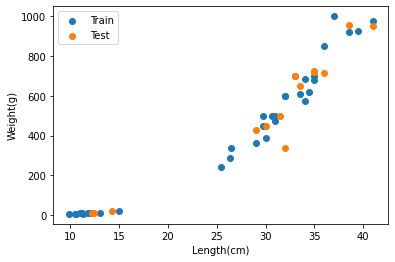

In [53]:
# x_train, x_test 시각화 (Weight ~ Length)
plt.scatter(X_train[:, 1], X_train[:, 0], label='Train')
plt.scatter(X_test[:, 1], X_test[:, 0], label='Test')
plt.legend()
plt.xlabel('Length(cm)')
plt.ylabel('Weight(g)')
plt.show()

# 모델 훈련, 평가

In [54]:
knn_clf = KNeighborsClassifier()  # KNN 모델 생성

In [55]:
knn_clf.fit(X=X_train, y=y_train)  # 모델을 훈련 셋(특성과 레이블)에 fitting

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [57]:
# 훈련 셋에서의 평가
train_pred = knn_clf.predict(X=X_train)  # 훈련 셋 예측값
train_acc = np.mean(y_train == train_pred)  # 훈련 셋 정확도
train_acc

1.0

In [58]:
confusion_matrix(y_true=y_train, y_pred=train_pred)  # 훈련 셋 오차(혼동) 행렬

array([[24,  0],
       [ 0, 11]])

In [59]:
# 테스트 셋에서의 평가
test_pred = knn_clf.predict(X=X_test)  # 테스트 셋 예측값
test_acc = np.mean(y_test == test_pred)  # 테스트 셋 정확도
test_acc

1.0

In [60]:
confusion_matrix(y_test, test_pred)

array([[11,  0],
       [ 0,  3]])

In [61]:
report = classification_report(y_test, test_pred)
print(report)

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        11
       Smelt       1.00      1.00      1.00         3

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



**분류 평가 지표(classification metrics)**

* 용어 정리
    * TN(True Negative, 진짜 음성): 실제 음성(negative)인 것을 음성으로 맞게 예측.
    * FP(False Positive, 가짜 양성): 실제 음성(negative)인 것을 양성(positive)으로 틀리게 예측.
    * FN(False Negative, 가짜 음성): 실제 양성(positive)인 것을 음성(negative)으로 틀리게 예측.
    * TP(True Positive, 진짜 양성): 실제 양성(positive)인 것을 양성으로 맞게 예측.

* 정확도(accuracy): 샘플들을 정확하게 분류한 비율. 전체 샘플들 중 정답의 비율.
> accuracy = (TN + TP) / (TN + FP + FN + TP)
* 정밀도(precision): 양성 예측들 중 정답 비율. 양성으로 예측한 샘플들 중에서 정확하게 예측한 비율.
> precision = TP / (FP + TP)
* 재현율(recall): 실제 양성 샘플들 중 정답 비율. 실제로 양성인 샘플들 중에서 정확하게 예측한 비율.
> recall = TP / (FN + TP)
* F1-score: 정밀도와 재현율의 조화 평균(역수들의 평균의 역수)
> f1 = 2 / (1/precission + 1/recall)


# Stratified Sampling(층화 추출)

데이터 셋에서 각 클래스의 비율이 훈련 셋과 테스트 셋에서 같게 유지가 되도록 샘플링하는 방법.

In [63]:
# 훈련 특성, 테스트 특성, 훈련 타겟, 테스트 타겟
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42)
# test_size: 정수이면, 테스트 셋의 크기(샘플 개수). 
#   0.0 ~ 1.0 사이의 실수이면, 전체 샘플 중 테스트 셋의 비율.
# train_size: 정수이면, 훈련 셋의 크기(샘플 개수).
#   0.0 ~ 1.0 사이의 실수이면, 전체 샘플 중 훈련 셋의 비율.
#> train_test_split() 함수를 호출할 때는 test_size 또는 train_size 중 하나만 설정하면 나머지는 자동으로 계산.
# stratify: 층화 추출의 기준이 되는(각 클래스의 비율을 알 수 있는) 1d array.

훈련 셋과 테스트 셋의 shape 확인

In [64]:
X_train.shape, X_test.shape

((34, 2), (15, 2))

In [65]:
y_train.shape, y_test.shape

((34,), (15,))

훈련 레이블과 테스트 레이블에서 도미(bream)과 빙어(smelt)의 비율 확인

In [66]:
np.unique(y_train, return_counts=True)

(array(['Bream', 'Smelt'], dtype=object), array([24, 10]))

In [67]:
24/34, 10/34  # 훈련 레이블에서 도미(bream), 빙어(smelt) 비율

(0.7058823529411765, 0.29411764705882354)

In [68]:
np.unique(y_test, return_counts=True)

(array(['Bream', 'Smelt'], dtype=object), array([11,  4]))

In [69]:
11/15, 4/15  # 테스트 레이블에서 도미(bream), 빙어(smelt) 비율

(0.7333333333333333, 0.26666666666666666)

# 모델 훈련, 평가

In [70]:
knn_clf = KNeighborsClassifier()  # 모델 생성

In [71]:
knn_clf.fit(X=X_train, y=y_train)  # 모델 훈련

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [72]:
# 훈련 셋에서 평가
train_pred = knn_clf.predict(X_train)  # 훈련 셋 예측값
accuracy_score(y_true=y_train, y_pred=train_pred)  # 훈련 셋 정확도

1.0

In [74]:
# 테스트 셋에서 평가
test_pred = knn_clf.predict(X_test)  # 테스트 셋 예측값
accuracy_score(y_true=y_test, y_pred=test_pred)  # 테스트 셋 정확도

1.0

In [75]:
confusion_matrix(y_test, test_pred)  # 테스트 셋 오차(혼동) 행렬

array([[11,  0],
       [ 0,  4]])

# 특성 스케일링(feature scaling)

## 특성 스케일링의 필요성

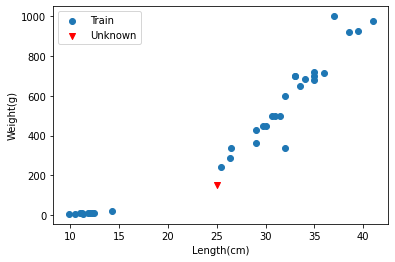

In [80]:
# 훈련 셋(x축: Length, y축: Weight) 시각화
plt.scatter(X_train[:, 1], X_train[:, 0], label='Train')

# 가상의 테스트 데이터(25cm, 150g 생선) 시각화
plt.scatter(25, 150, label='Unknown', marker='v', color='red')

plt.xlabel('Length(cm)')
plt.ylabel('Weight(g)')
plt.legend()
plt.show()

In [ ]:
# 가상의 데이터를 만들고, 위에서 훈련된 knn_clf로 예측값을 찾아보세요.